<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Probability_Distribution_last_lect_of_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Content**

Exponential Distribution

Box Cox Transformation

Geometric Distribution


*   Mean of Geometric Distribution



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import poisson, expon, geom

Example: Q. You receive 240 messages per hour on average - assume Poisson distributed.

Rate of messages arriving per second is 1/15.

In [2]:
240/3600

0.06666666666666667

Q1) What is the probability of having no message in 10 seconds?

In [3]:
#lam = 10/15
poisson.pmf( k= 0, mu = 10/15)



0.513417119032592

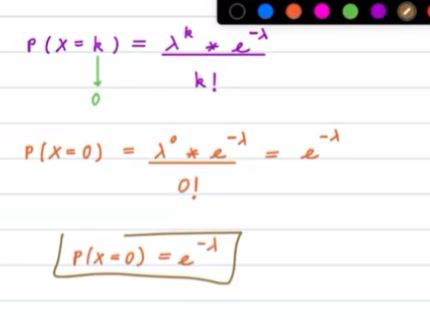

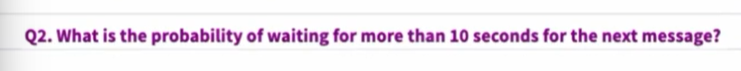

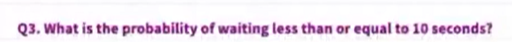

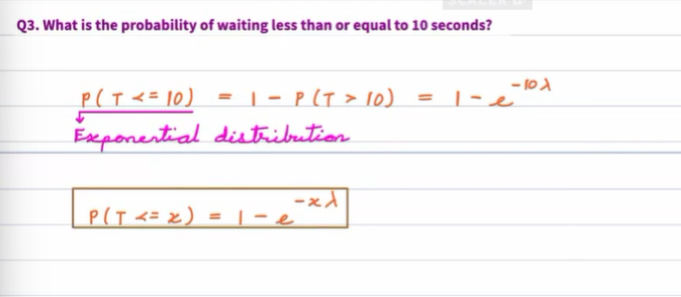

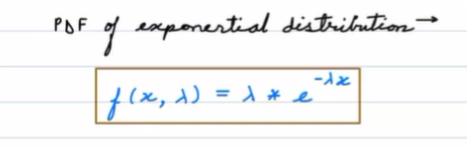

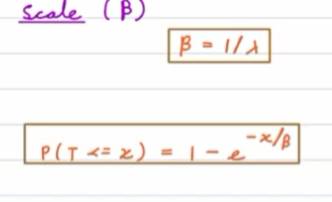

In [5]:
# Q2) P[T > 10], scale = 1/lambad = 1/(1/15) = 15
p = 1- expon.cdf(x = 10, scale = 15)
p

0.513417119032592

In [6]:
# Q3) P[T <= 10]
expon.cdf(x=10, scale=15)

0.486582880967408

You are working as a data engineer who has to resolve any bugs/
failures of machine learning models in production.
The time taken to debug is exponentially distributed with mean of 5 minutes

In [ ]:
# The time taken to debug is exponentially distributed with mean of 5 minutes.
# 1 bug can be solved on average in 5 min.              -> beta
# How many bugs can be solve in 1 min on average -> 1/5 -> lam

# lam = 1/5
# beta = 1 / lam = 5

Q1 Find the probability of debugging in 4 to 5 minutes

In [7]:
# P[4 < T < 5] = P[T <= 5] - P[T <= 4]
prob = expon.cdf(x=5, scale=5) - expon.cdf(x=4, scale=5)
prob

0.08144952294577923

In [8]:
# P[T > 6] = 1 - P[T <= 6]
prob = 1 - expon.cdf(x=6, scale=5)
prob

0.3011942119122022

Q3. Given that you have already spent 3 minutes, what is the probability of needing more than 9 minutes

In [9]:
# P[T > 9 | T > 3]
# P(A | B) = P(A intersection B) / P(B)
# P [T > 9 | T > 3] = P[T > 9 intersection T > 3] / P (T > 3)

#P[T > 9 intersection T > 3] -- P[T>9]

# P [ T > 9 | T > 3] = P[T>9]/ P[T>3]


# P[T > 9] = 1 - P[T <= 9]
a = 1 - expon.cdf(x = 9, scale = 5)

# P[T > 3] = 1 - P[T <= 3]
b = 1 - expon.cdf(x = 3, scale = 5)

a/b


0.30119421191220214

**Memoryless property of the Exponential distribution:**

The memoryless property essentially means that the time you've already spent on an event doesn't affect the future waiting time.


*   In the context of the exponential …distribution treats each moment as if you're starting new, regardless of the past.

Suppose you have a system that fails, on average, every 50 hours.


What is the probability that the system will fail within the first 20 hours?

In [11]:
# lam = 1/50
# scale = 50

# P[T <= 20]

expon.cdf(x = 20, scale = 50)

0.3296799539643607

#**Boc Cox Tranformation**

technique used to stabilize variance and make dataset more closely approx normal distribution

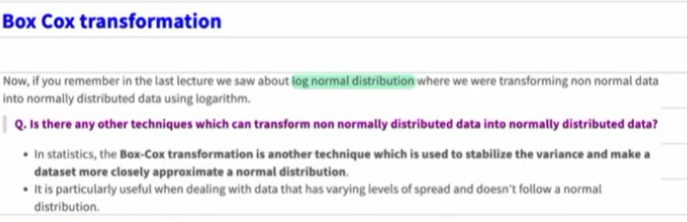


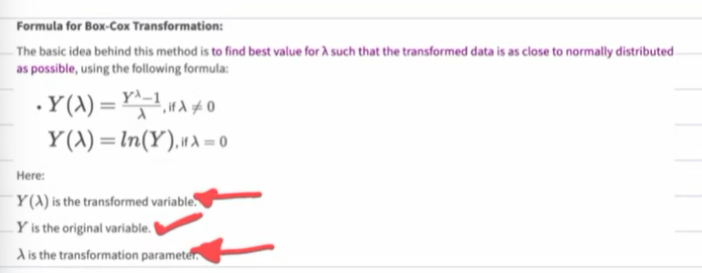

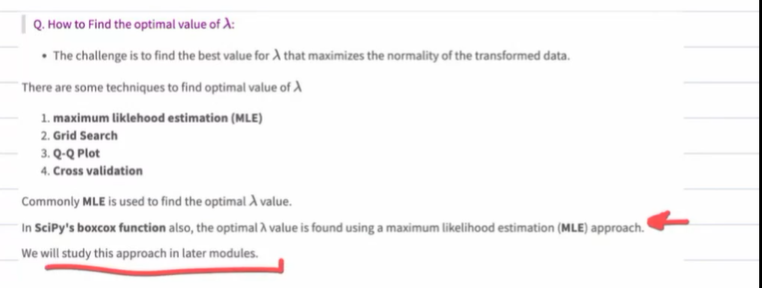

<ipython-input-12-e21d657e691f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True)


<Axes: ylabel='Density'>

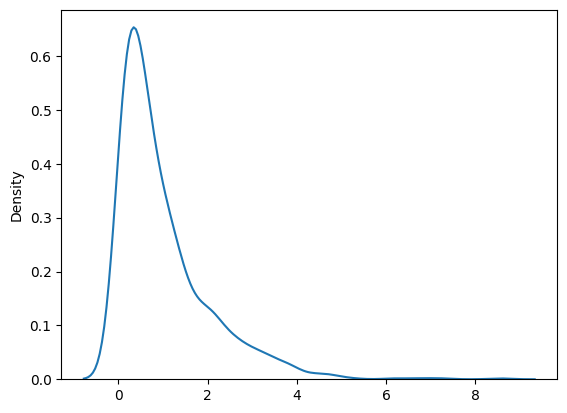

In [12]:
from scipy.stats import boxcox

#make this example reproducible
np.random.seed(0)

#generate dataset
data = np.random.exponential(size=1000)

#plot the distribution of data values
sns.distplot(data, hist=False, kde=True)